## Anomaly Detection on Machine Failures
### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.api import VAR

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
df = pd.read_excel("Downloads/BearingVibration_Dataset.xlsx")#, parse_dates=['Unnamed: 0'])
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [3]:
df = df.rename(columns = {'Unnamed: 0' : 'datetime'})
df.head()

,datetime,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [4]:
df_index = df.set_index('datetime')
df_index.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
datetime,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


### Check missing values of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   982 non-null    datetime64[ns]
 1   Bearing 1  982 non-null    float64       
 2   Bearing 2  982 non-null    float64       
 3   Bearing 3  982 non-null    float64       
 4   Bearing 4  982 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.5 KB


In [6]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 982 entries, 2004-02-12 10:52:39 to 2004-02-19 06:22:39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bearing 1  982 non-null    float64
 1   Bearing 2  982 non-null    float64
 2   Bearing 3  982 non-null    float64
 3   Bearing 4  982 non-null    float64
dtypes: float64(4)
memory usage: 38.4 KB


In [7]:
df.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,982.000000,982.000000,982.000000,982.000000
mean,0.080951,0.078543,0.081351,0.047830
std,0.040200,0.011789,0.011607,0.009549
min,0.001168,0.000767,0.000716,0.001699
25%,0.060773,0.074240,0.076829,0.043951
50%,0.062021,0.075206,0.078187,0.044524
75%,0.083277,0.077458,0.080575,0.048130
max,0.453335,0.161016,0.151299,0.119047


In [8]:
df_index.describe()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,982.000000,982.000000,982.000000,982.000000
mean,0.080951,0.078543,0.081351,0.047830
std,0.040200,0.011789,0.011607,0.009549
min,0.001168,0.000767,0.000716,0.001699
25%,0.060773,0.074240,0.076829,0.043951
50%,0.062021,0.075206,0.078187,0.044524
75%,0.083277,0.077458,0.080575,0.048130
max,0.453335,0.161016,0.151299,0.119047


In [9]:
df.isnull()

,datetime,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
977,False,False,False,False,False
978,False,False,False,False,False
979,False,False,False,False,False
980,False,False,False,False,False


In [10]:
df_index.isnull()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
datetime,,,,
2004-02-12 10:52:39,False,False,False,False
2004-02-12 11:02:39,False,False,False,False
2004-02-12 11:12:39,False,False,False,False
2004-02-12 11:22:39,False,False,False,False
2004-02-12 11:32:39,False,False,False,False
...,...,...,...,...
2004-02-19 05:42:39,False,False,False,False
2004-02-19 05:52:39,False,False,False,False
2004-02-19 06:02:39,False,False,False,False


### Exploratory Data Analysis (EDA)

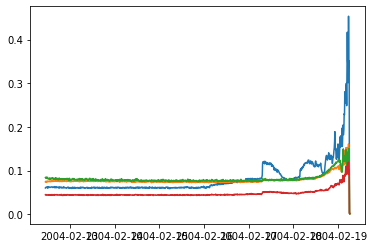

In [11]:
plt.plot(df_index)
#plt.plot(df["datetime"], df["Bearing 1"])

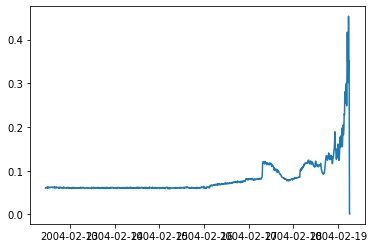

In [12]:
plt.plot(df["datetime"], df["Bearing 1"])

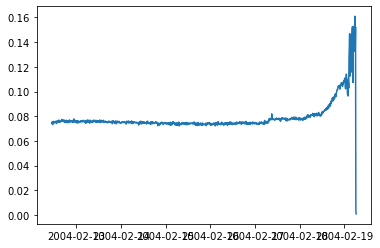

In [13]:
plt.plot(df["datetime"], df["Bearing 2"])

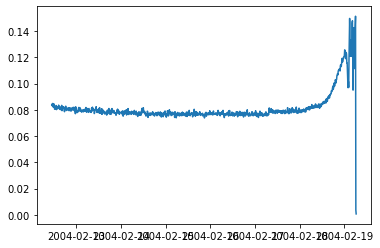

In [14]:
plt.plot(df["datetime"], df["Bearing 3"])

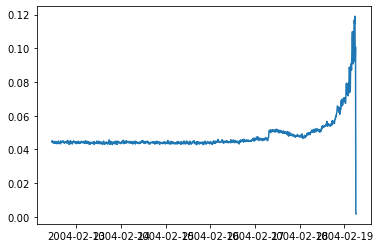

In [15]:
plt.plot(df["datetime"], df["Bearing 4"])

As we can see from the plot figure, there is a flop at the end of the data. If we really see the real data by our own naked eyes too, we can see the drop suddenly come at the end from above 0.5 to be below 0.1. This shows there are some anomalies/outlier on the data.

As we don't know where the anomalies located right now from just looking at the plot figure, we have to normalize the data and do some preditions for the outlier.

#### Since we are dealing with "Time Series" data type, we have to check if the data is Stationary or Non-Stationary. This is important because dealing with Time Series data will get you lower or unexpected result if you dont know which type the data is.

There are 2 approaches that i used to check it:
1. Augmented Dickey-Fuller (ADF) Test
2. Kwiatkowski-Philips-Schmidt-Shin (KPSS) Test

### Perform ADF Test

In [16]:
def adf_test(timeseries):
    # Perform Augmented Dickey-Fuller Test:
    print("Results of Augmented Dickey-Fuller Test: ")
    adftest = adfuller(timeseries, autolag='AIC')
    adfoutput = pd.Series(adftest[0:4], index=['Test Statistics', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adftest[4].items():
        adfoutput['Critical Value (%s) '%key] = value
    print(adfoutput)
    
# Apply adf test on the series
adf_test(df['Bearing 1'])
adf_test(df['Bearing 2'])
adf_test(df['Bearing 3'])
adf_test(df['Bearing 4'])

Results of Augmented Dickey-Fuller Test: 
Test Statistics                  0.891740
p-value                          0.992982
#Lags Used                      22.000000
Number of Observations Used    959.000000
Critical Value (1%)             -3.437187
Critical Value (5%)             -2.864559
Critical Value (10%)            -2.568377
dtype: float64
Results of Augmented Dickey-Fuller Test: 
Test Statistics                  3.288457
p-value                          1.000000
#Lags Used                      22.000000
Number of Observations Used    959.000000
Critical Value (1%)             -3.437187
Critical Value (5%)             -2.864559
Critical Value (10%)            -2.568377
dtype: float64
Results of Augmented Dickey-Fuller Test: 
Test Statistics                  1.857942
p-value                          0.998457
#Lags Used                      22.000000
Number of Observations Used    959.000000
Critical Value (1%)             -3.437187
Critical Value (5%)             -2.864559
Crit

Since the p-value is not less than .05, we fail to reject the null hypothesis. This means the time series is non-stationary. In other words, it has some time-dependent structure and does not have constant variance over time.

Test for stationary is :

If the Test Statistic < the Critical Value, we can reject the null hypothesis (The series is stationary). When the Test Statistics > Critical Value, we fail to reject the null hypothesis (The series is Non-Stationary).

### KPSS (Kwiatkowski-Philips-Schmidt-Shin) Test

In [17]:
def kpss_test(timeseries):
    print("Results of KPSS Test: ")
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

# Apply kpss test on the series
kpss_test(df['Bearing 1'])
kpss_test(df['Bearing 2'])
kpss_test(df['Bearing 3'])
kpss_test(df['Bearing 4'])

Results of KPSS Test: 
Test Statistic            2.417452
p-value                   0.010000
Lags Used                22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test: 
Test Statistic            1.532232
p-value                   0.010000
Lags Used                22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test: 
Test Statistic            1.242767
p-value                   0.010000
Lags Used                22.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
Results of KPSS Test: 
Test Statistic            1.882379
p-value                   0.010000
Lags Used                22.000000
Critical Value (10%)   

Test for stationarity is :

If the Test Statistic > Critical Value, we reject the null hypothesis (Series is Non-Stationary). If the Test Statistic < Critical Value, we can't reject the null hypothesis (Series is Stationary). We can say this data is Non-Stationary.

### Check for all columns if its stationary or non stationary
This is only done with ADF test

In [18]:
def test_stationary(timeseries, column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(timeseries, autolag='AIC')
    else:
        adf_test = adfuller(timeseries[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [19]:
adf_test_results = {
    col: test_stationary(df_index, col)
    for col in df_index.columns
}
adf_test_results

{'Bearing 1': 'Non-Stationary',
 'Bearing 2': 'Non-Stationary',
 'Bearing 3': 'Non-Stationary',
 'Bearing 4': 'Non-Stationary'}

##### Convert non-stationary data into stationary data
There are many ways to convert the non-stationary data into stationary data like differencing, log transformation, and seasonal decomposition/seasonal differencing. I will be using Differencing method to convert the data.

In [20]:
def differencing(timeseries, column, order):
    differenced_data = timeseries[column].diff(order)
    differenced_data.fillna(differenced_data.mean(), inplace=True)
    return differenced_data
for col in df_index.columns:
    df_index[col] = differencing(df_index, col, 1)

In [21]:
adf_test_results = {
    col: test_stationary(df_index, col)
    for col in df_index.columns
}
adf_test_results

{'Bearing 1': 'Stationary',
 'Bearing 2': 'Stationary',
 'Bearing 3': 'Stationary',
 'Bearing 4': 'Stationary'}

## Anomaly Detection

### Using VAR (Vector Auto-Regression) Model

In [22]:
max_lag = 20
var_model = VAR(df_index)

# select the best lag order
lag_results = var_model.select_order(max_lag)
selected_lag = lag_results.aic
print(selected_lag)

20


In [23]:
def find_anomalies(squared_errors):
    threshold = np.mean(squared_errors) + np.std(squared_errors)
    predictions = (squared_errors >= threshold).astype(int)
    return predictions, threshold

var = VAR(df_index)
var_fitresults = var.fit(selected_lag)
squared_errors = var_fitresults.resid.sum(axis=1) ** 2
predictions, threshold = find_anomalies(squared_errors)
print(threshold)

0.00031680749167823725


threshold = mean(squared_errors) + z * standard_deviation(squared_errors)

We can fit the VAR model and find the squared erros of the data by using the selected lag. The squared errors are used to fine the threshold and also can act as an observations of which data can be considered to be anomalies.

In [24]:
data = df_index.iloc[selected_lag:, :]
data['Predictions'] = predictions.values
data

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,Predictions
datetime,,,,,
2004-02-12 14:12:39,-0.000112,-0.001499,-0.000481,-0.000338,0
2004-02-12 14:22:39,0.000093,0.001593,-0.000679,0.001614,0
2004-02-12 14:32:39,-0.000158,0.000147,0.002440,-0.000524,0
2004-02-12 14:42:39,-0.001120,-0.001506,-0.001008,-0.000374,0
2004-02-12 14:52:39,0.000123,0.001520,-0.001693,-0.000276,0
...,...,...,...,...,...
2004-02-19 05:42:39,0.151992,0.020581,0.025977,0.004552,0
2004-02-19 05:52:39,-0.115753,-0.028617,0.007552,-0.026923,1
2004-02-19 06:02:39,0.013529,0.019867,0.006307,0.008693,0


In [25]:
data['Predictions'].value_counts()

0    924
1     38
Name: Predictions, dtype: int64

Now we get the predictions for the data and knows where the anomalies/outliers are located and how many outliers from the data are there. From the data, we know that label 1 is for anomalies/outliers and label 0 is for normal data.

In conclusion, we have 924 normal data and 38 anomalies/outliers from the model that we tried.